<a href="https://colab.research.google.com/github/Ishan9928/Projects-Dashboard/blob/main/Music_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Read Datasets

In [19]:
df = pd.read_csv('/content/data[1].csv')
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [20]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


In [21]:
df.isna().sum()

,0
acousticness,0
artists,0
danceability,0
duration_ms,0
energy,0
explicit,0
id,0
instrumentalness,0
key,0
liveness,0


In [22]:
df.info

<bound method DataFrame.info of         acousticness                                   artists  danceability  \
0             0.9950                       ['Carl Woitschach']         0.708   
1             0.9940  ['Robert Schumann', 'Vladimir Horowitz']         0.379   
2             0.6040                   ['Seweryn Goszczyński']         0.749   
3             0.9950                      ['Francisco Canaro']         0.781   
4             0.9900  ['Frédéric Chopin', 'Vladimir Horowitz']         0.210   
...              ...                                       ...           ...   
169904        0.1730                    ['DripReport', 'Tyga']         0.875   
169905        0.0167        ['Leon Bridges', 'Terrace Martin']         0.719   
169906        0.5380                     ['Kygo', 'Oh Wonder']         0.514   
169907        0.0714             ['Cash Cash', 'Andy Grammer']         0.646   
169908        0.1090                        ['Ingrid Andress']         0.512   

        duration_ms  energy  explicit                      id  \
0            158648  0.1950         0  6KbQ3uYMLKb5jDxLF7wYDD   
1            282133  0.0135         0  6KuQTIu1KoTTkLXKrwlLPV   
2            104300  0.2200         0  6L63VW0PibdM1HDSBoqnoM   
3            180760  0.1300         0  6M94FkXd15sOAOQYRnWPN8   
4            687733  0.2040         0  6N6tiFZ9vLTSOIxkj8qKrd   
...             ...     ...       ...                     ...   
169904       163800  0.4430         1  4KppkflX7I3vJQk7urOJaS   
169905       167468  0.3850         0  1ehhGlTvjtHo2e4xJFB0SZ   
169906       180700  0.5390         0  52eycxprLhK3lPcRLbQiVk   
169907       167308  0.7610         0  3wYOGJYD31sLRmBgCvWxa4   
169908       214787  0.4280         0  60RFlt48hm0l4Fu0JoccOl   

        instrumentalness  key  liveness  loudness  mode  \
0               0.563000   10    0.1510   -12.428     1   
1               0.901000    8    0.0763   -28.454     1   
2               0.000000    5    0.1190   -19.924     0   
3               0.887000    1    0.1110   -14.734     0   
4               0.908000   11    0.0980   -16.829     1   
...                  ...  ...       ...       ...   ...   
169904          0.000032    1    0.0891    -7.461     1   
169905          0.031300    8    0.1110   -10.907     1   
169906          0.002330    7    0.1080    -9.332     1   
169907          0.000000    1    0.2220    -2.557     1   
169908          0.000000    0    0.1050    -7.387     1   

                                                 name  popularity  \
0                         Singende Bataillone 1. Teil           0   
1            Fantasiestücke, Op. 111: Più tosto lento           0   
2                      Chapter 1.18 - Zamek kaniowski           0   
3       Bebamos Juntos - Instrumental (Remasterizado)           0   
4         Polonaise-Fantaisie in A-Flat Major, Op. 61           1   
...                                               ...         ...   
169904                  Skechers (feat. Tyga) - Remix          75   
169905                 Sweeter (feat. Terrace Martin)          64   
169906                               How Would I Know          70   
169907                                    I Found You          70   
169908                          More Hearts Than Mine          65   

       release_date  speechiness    tempo  valence  year  
0              1928       0.0506  118.469   0.7790  1928  
1              1928       0.0462   83.972   0.0767  1928  
2              1928       0.9290  107.177   0.8800  1928  
3        1928-09-25       0.0926  108.003   0.7200  1928  
4              1928       0.0424   62.149   0.0693  1928  
...             ...          ...      ...      ...   ...  
169904   2020-05-15       0.1430  100.012   0.3060  2020  
169905   2020-06-08       0.0403  128.000   0.2700  2020  
169906   2020-05-29       0.1050  123.700   0.1530  2020  
169907   2020-02-28       0.0385  129.916   0.4720  2020  
169908   2020-03-27       0.0271   80.5

In [23]:
dfx = df.drop(columns=['artists', 'id','name'])

In [24]:
dfx.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,valence,year
0,0.995,0.708,158648,0.1950,0,0.563,10,0.1510,-12.428,1,0,1928,0.0506,118.469,0.7790,1928
1,0.994,0.379,282133,0.0135,0,0.901,8,0.0763,-28.454,1,0,1928,0.0462,83.972,0.0767,1928
2,0.604,0.749,104300,0.2200,0,0.000,5,0.1190,-19.924,0,0,1928,0.9290,107.177,0.8800,1928
3,0.995,0.781,180760,0.1300,0,0.887,1,0.1110,-14.734,0,0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,0.210,687733,0.2040,0,0.908,11,0.0980,-16.829,1,1,1928,0.0424,62.149,0.0693,1928


In [25]:
dfx = dfx.drop(columns=['year', 'release_date'])

In [26]:
dfx.corr()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
acousticness,1.000000,-0.265950,-0.079311,-0.750283,-0.253690,0.335821,-0.021686,-0.023871,-0.567072,0.046475,-0.593345,-0.056077,-0.204982,-0.185540
danceability,-0.265950,1.000000,-0.134500,0.220569,0.241891,-0.281429,0.022599,-0.105532,0.294170,-0.045306,0.221077,0.225305,-0.004872,0.560242
duration_ms,-0.079311,-0.134500,1.000000,0.036396,-0.043811,0.084814,-0.003116,0.034270,-0.014687,-0.046981,0.063292,-0.058449,-0.028816,-0.198760
energy,-0.750283,0.220569,0.036396,1.000000,0.142677,-0.287692,0.029984,0.126293,0.782982,-0.038355,0.497488,-0.045226,0.249936,0.350086
explicit,-0.253690,0.241891,-0.043811,0.142677,1.000000,-0.138292,0.008578,0.039272,0.152695,-0.083221,0.214044,0.413074,0.011484,-0.022327
instrumentalness,0.335821,-0.281429,0.084814,-0.287692,-0.138292,1.000000,-0.014268,-0.047397,-0.417033,-0.035051,-0.299829,-0.115735,-0.107570,-0.193929
key,-0.021686,0.022599,-0.003116,0.029984,0.008578,-0.014268,1.000000,-0.000106,0.021920,-0.112766,0.010675,0.015225,0.003148,0.029064
liveness,-0.023871,-0.105532,0.034270,0.126293,0.039272,-0.047397,-0.000106,1.000000,0.052985,0.005393,-0.075293,0.147667,0.008124,-0.000426
loudness,-0.567072,0.294170,-0.014687,0.782982,0.152695,-0.417033,0.021920,0.052985,1.000000,-0.013147,0.466546,-0.105796,0.211114,0.308418
mode,0.046475,-0.045306,-0.046981,-0.038355,-0.083221,-0.035051,-0.112766,0.005393,-0.013147,1.000000,-0.032854,-0.057493,0.014539,0.014727


<Axes: >

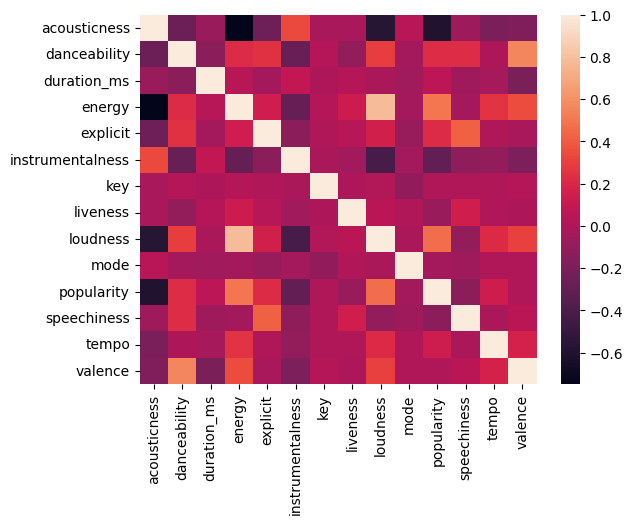

In [27]:
correlation = dfx.corr()
sns.heatmap(correlation,
            xticklabels = correlation.columns.values,
            yticklabels = correlation.columns.values)

Data understanding by Visualization

<Axes: xlabel='loudness', ylabel='energy'>

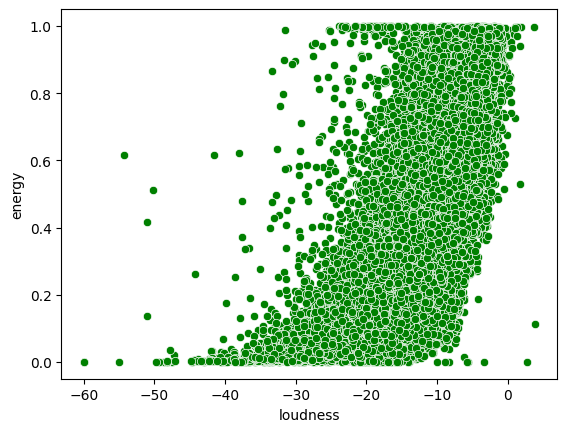

In [28]:
sns.scatterplot(x="loudness", y="energy", data=dfx, color='green')

In [29]:
y = df['loudness']
x = df['energy']

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8, random_state = 41)

In [31]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (135927,)
y_train shape: (135927,)


In [32]:
x_train = x_train.values.reshape(-1, 1)

In [33]:
x_test = x_test.values.reshape(-1, 1)

In [35]:
rf = RandomForestRegressor()
model = rf.fit(x_train, y_train)

In [36]:
model.score(x_test,y_test)

0.6899407242651376